In [ ]:
from ultralytics import YOLO
# from wandb.integration.ultralytics import add_wandb_callback
import os  
# import wandb
import yaml
import warnings 
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
# Initialize WandB
project="human_parsing"

# wandb.init(project=project)

# Load a model
pretrained = "weights/yolov8n-seg.pt"
pretrained = "/home/jordan/SEGMENT/human_parsing/train8/weights/best.pt"
model = YOLO(pretrained, task='segment')  # Load a pretrained model (recommended for training)

# Load labels from YAML configuration file
yaml_file = "configs/fashion_people_detection.yml"
with open(yaml_file, 'r') as f:
    config = yaml.safe_load(f)
    class_labels = config['names']  # Adjust the key based on your YAML structure

# Add WandB callback
# add_wandb_callback(model)

bs = 32
workers = os.cpu_count()
# Train the model
results = model.train(project=project, data=yaml_file, epochs=50, imgsz=1024, batch=bs, workers=workers)

# Finish the W&B run
# wandb.finish()

In [4]:
import random
from PIL import Image
import requests
from utils import *
import yaml

yaml_file = "configs/fashion_people_detection.yml"
with open(yaml_file, 'r') as f:
    config = yaml.safe_load(f)

labels_dict = config.get('names')

In [5]:
model_path = "/home/jordan/SEGMENT/human_parsing/train9/weights/best.pt"
model = YOLO(model_path, task="segment")

In [6]:
url = "/home/jordan/SEGMENT/datasets/person_seg/images/val/600bce970676bcd01bc60f15c1a31f46.png"
# image = Image.open(requests.get(url, stream=True).raw)
# image = resize_preserve_aspect_ratio(image, 1024)
image = Image.open(url)
results = model(image)


0: 1024x672 1 hair, 1 face, 3 necks, 1 arm, 1 hand, 2 legs, 1 outfit, 1 person, 123.0ms
Speed: 3.0ms preprocess, 123.0ms inference, 7.0ms postprocess per image at shape (1, 3, 1024, 672)


hand


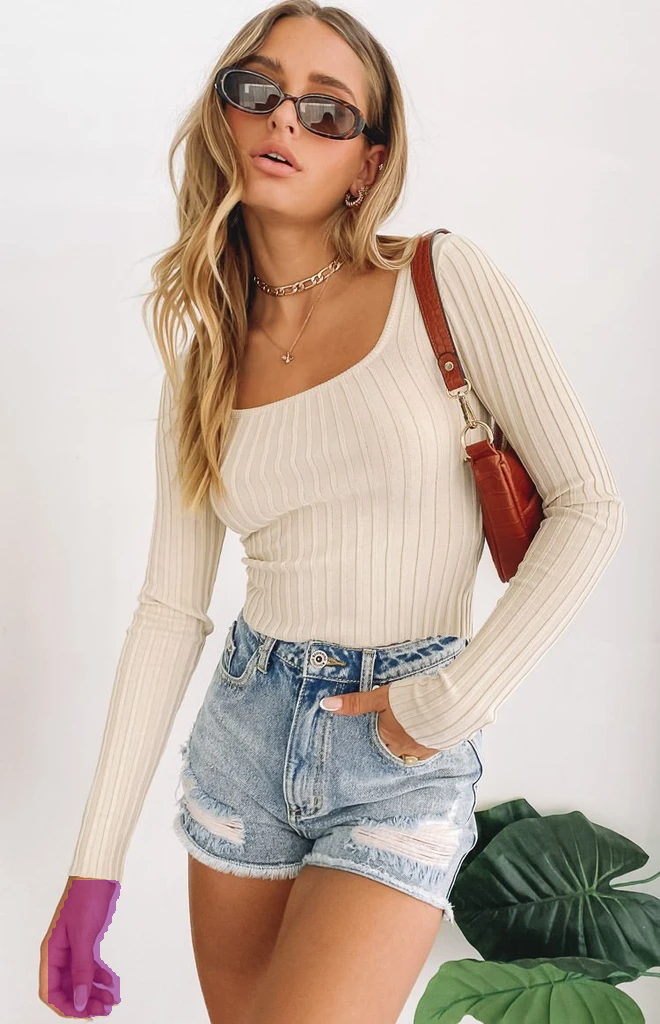

hair


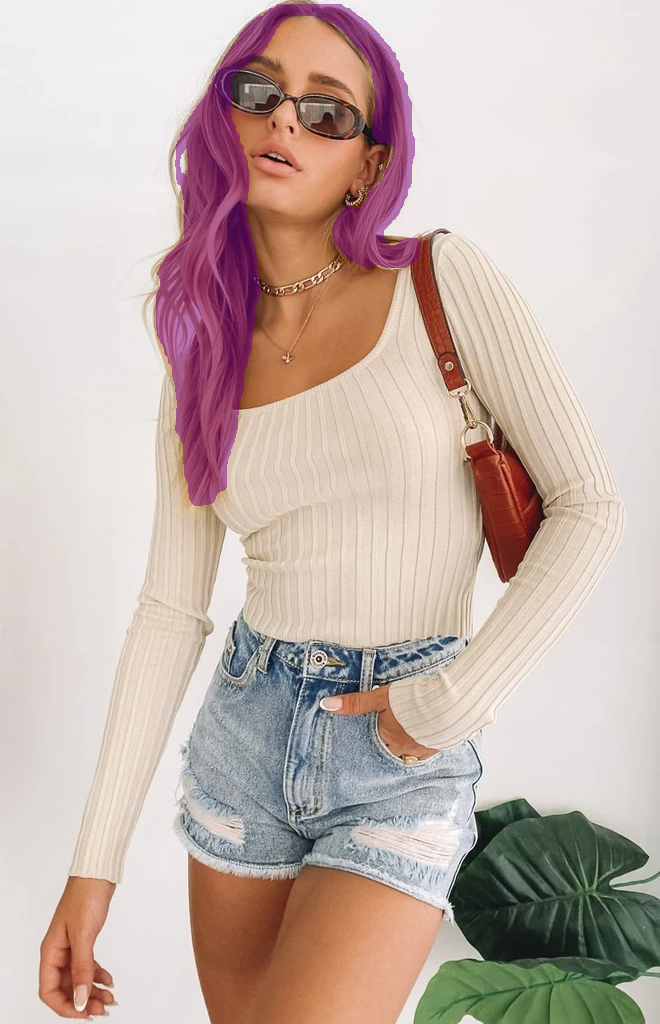

face


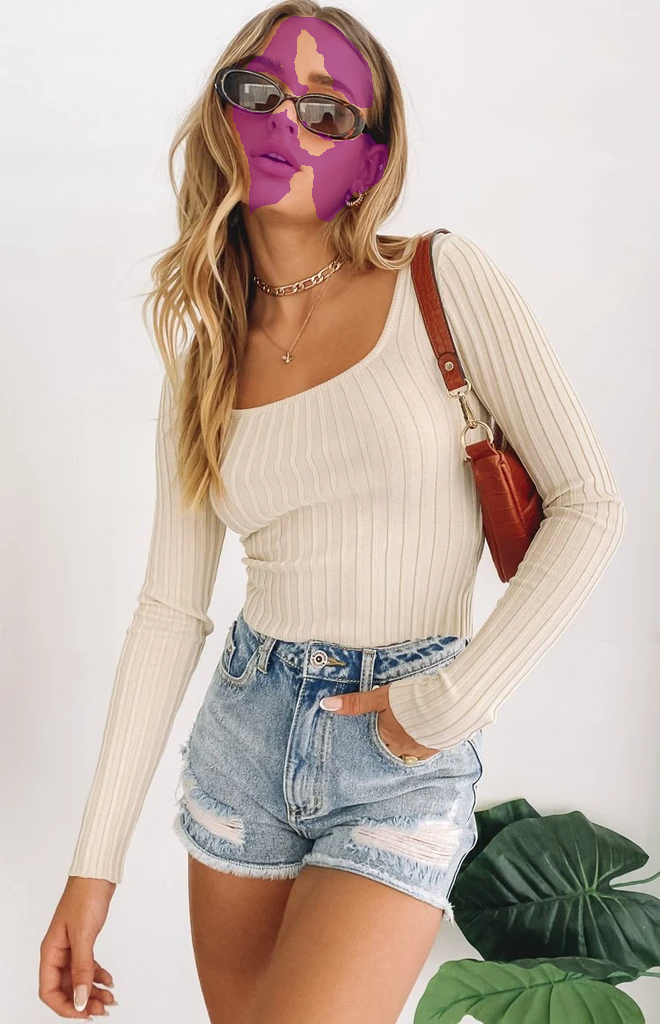

person


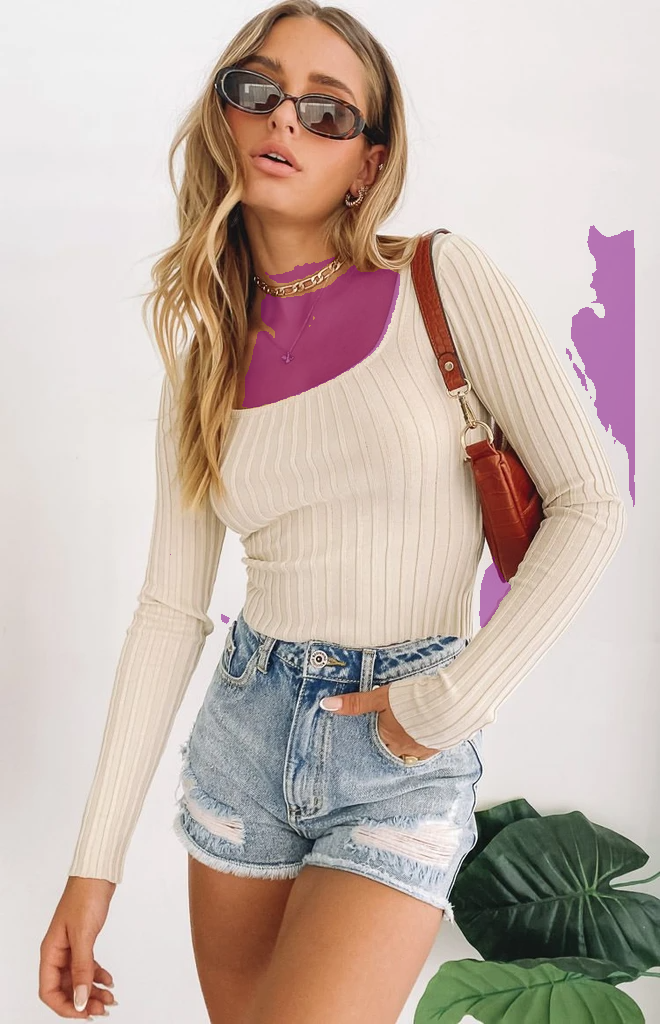

outfit


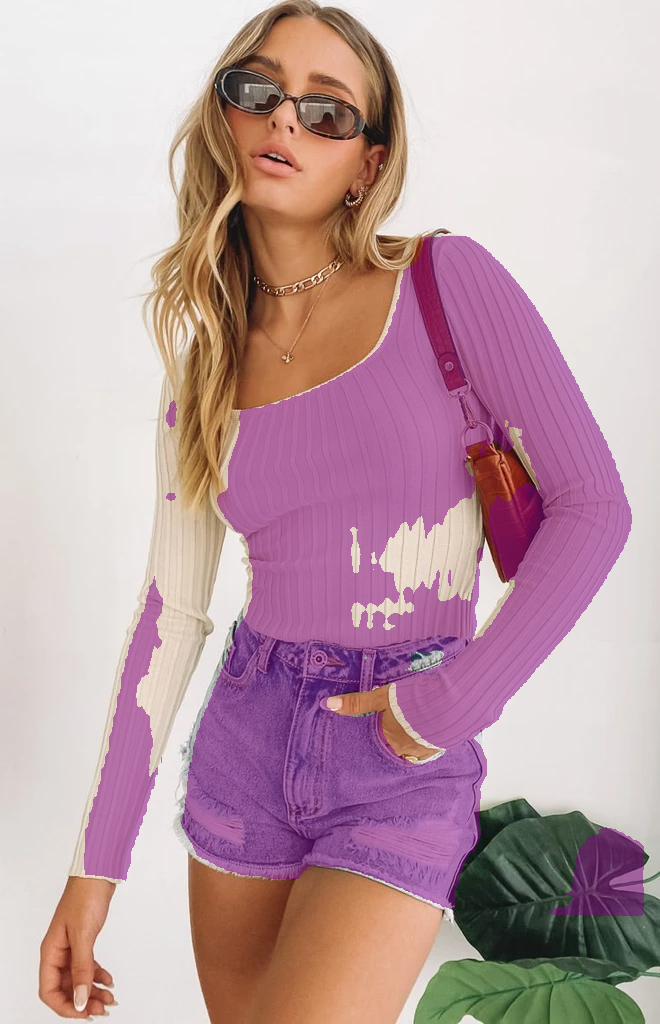

leg


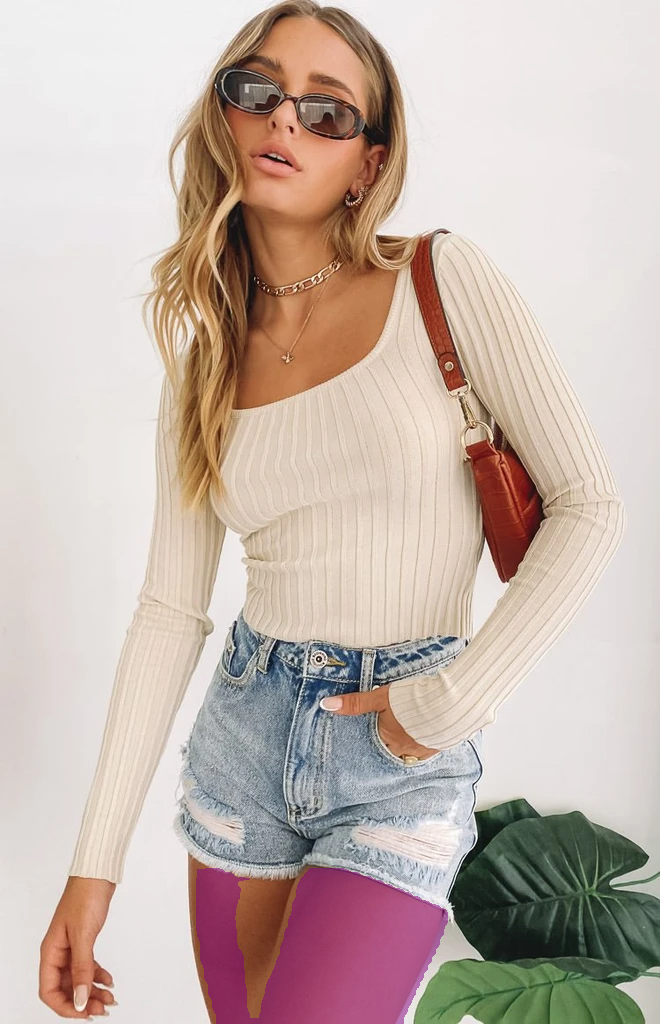

neck


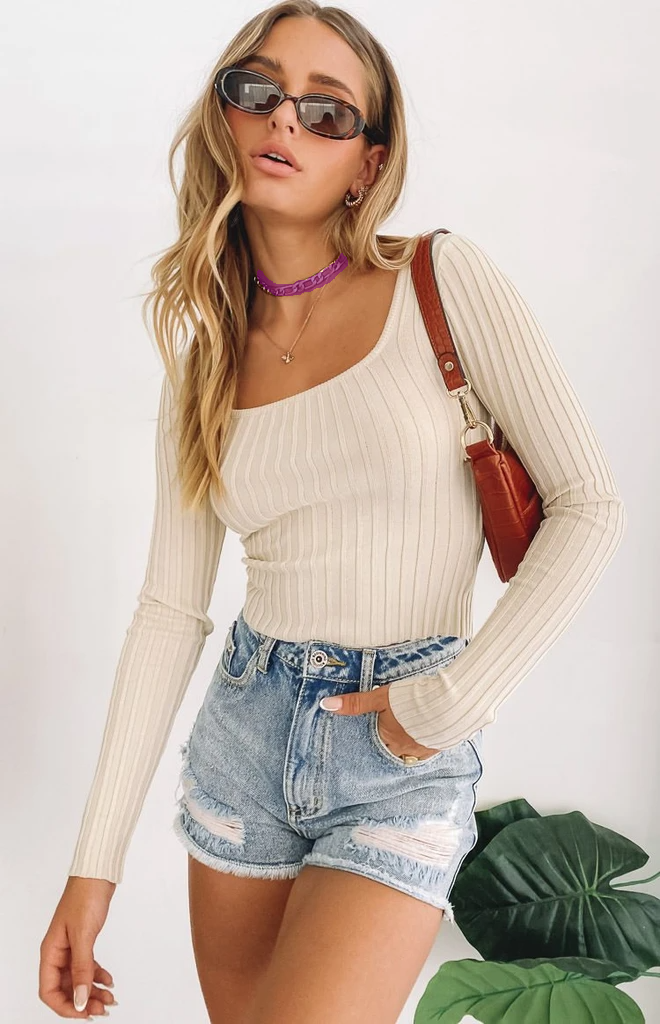

arm


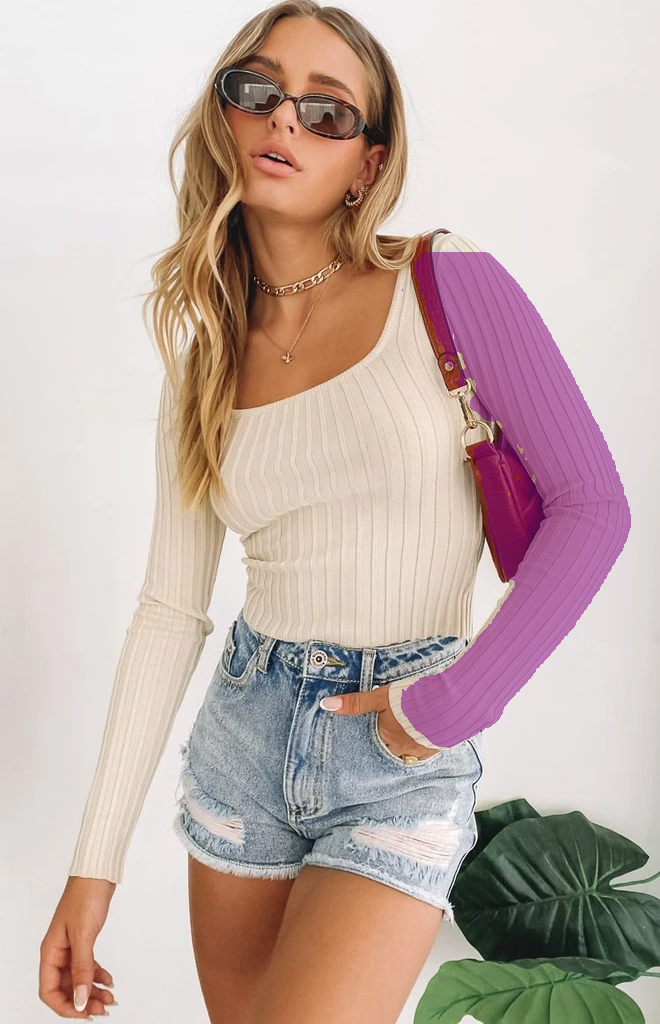

In [7]:
result = results[0]
labels = result.boxes.cls 
labels = [int(label.item()) for label in labels]
labels = [labels_dict[label] for label in labels]
masks = result.masks.data
masks = [unload_mask(mask) for mask in masks]

masks_dict = dict(zip(labels, masks))
for k, v in masks_dict.items():
    print(k)
    overlay = overlay_mask(image, v)
    display(overlay)